# Phase 2 Instructions

The purpose of this file is to analyse the phase 2 data. It will extract the journey time for each patient. It then removes outliers and creates visualisations based on the remaining patients.

## Package and Function Requirements

The next section loads in the required functions and packages.

In [ ]:
def lookup(date_pd_series, format=None):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
    return date_pd_series.map(dates)

## File Load In

Please note that the file used for phase 2 is called phase2_all_20220130.csv. It is in the MS Teams folder. 

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import datetime as dt
import math
import seaborn as sns
import scipy.stats as sps
from scipy import stats
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_list_noweekend = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

dftest = pd.read_csv('phase2_all_20220130.csv')

## Data Cleaning and Formatting

The section below is very similar if not the same across all three phases. Key differences are called out but this is where the data is formatted for analysis.

In [ ]:
dftest.dtypes

Patient     object
Location    object
from        object
to          object
dtype: object

In [ ]:
dftest = dftest.dropna()
dftest[['xlocation', 'ylocation']] = dftest['Location'].str.split(',', expand = True)
#dftest['from'] = pd.to_datetime(dftest['from'])
#dftest['to'] = pd.to_datetime(dftest['to'])

## Key Difference to other Phases

Please note that the data for phases 2 and 3 are in a different format to phase 1. This is reflected in the code below.

In [ ]:
dftest['newfrom'] = lookup(dftest['from'], format='%d/%m/%Y %H:%M')
dftest['newto'] = lookup(dftest['to'], format='%d/%m/%Y %H:%M')

In [ ]:
dftest

,Patient,Location,from,to,xlocation,ylocation,newfrom,newto
1,G1221,"4.511,4.699",30/11/2021 10:10,30/11/2021 10:10,4.511,4.699,2021-11-30 10:10:00,2021-11-30 10:10:00
2,G1221,"5.639,5.397",30/11/2021 10:10,30/11/2021 10:10,5.639,5.397,2021-11-30 10:10:00,2021-11-30 10:10:00
3,G1221,"4.77,4.893",30/11/2021 10:10,30/11/2021 10:10,4.77,4.893,2021-11-30 10:10:00,2021-11-30 10:10:00
4,G1221,"5.639,5.397",30/11/2021 10:10,30/11/2021 10:10,5.639,5.397,2021-11-30 10:10:00,2021-11-30 10:10:00
5,G1221,"4.77,4.885",30/11/2021 10:10,30/11/2021 10:10,4.77,4.885,2021-11-30 10:10:00,2021-11-30 10:10:00
...,...,...,...,...,...,...,...,...
105769,R4000,"6.951,5.072",20/12/2021 12:05,20/12/2021 12:06,6.951,5.072,2021-12-20 12:05:00,2021-12-20 12:06:00
105770,R4000,"6.347,5.889",20/12/2021 12:06,20/12/2021 12:06,6.347,5.889,2021-12-20 12:06:00,2021-12-20 12:06:00
105771,R4000,"6.977,5.084",20/12/2021 12:06,20/12/2021 12:06,6.977,5.084,2021-12-20 12:06:00,2021-12-20 12:06:00
105772,R4000,"6.347,5.889",20/12/2021 12:06,20/12/2021 12:06,6.347,5.889,2021-12-20 12:06:00,2021-12-20 12:06:00


In [ ]:
dftest.dtypes

Patient              object
Location             object
from                 object
to                   object
xlocation            object
ylocation            object
newfrom      datetime64[ns]
newto        datetime64[ns]
dtype: object

## Key Section

The code belows gets the earliest and latest times from a patient allowing the total journey time to be tracked.

In [ ]:
dfgrouped_first = dftest.groupby('Patient', as_index = False).agg({'newfrom': ['min'], 'newto': ['max'], 'xlocation': ['first'], 'ylocation': ['first']})

In [ ]:
dfgrouped_first.head()

,Patient,newfrom,newto,xlocation,ylocation
,,min,max,first,first
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,4.511,4.699
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,6.855,4.469
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,6.767,5.01
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,6.854,4.824
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,4.439,4.948


In [ ]:
dfgrouped_last = dftest.groupby('Patient', as_index = False).agg({'newfrom': ['min'], 'newto': ['max'], 'xlocation': ['last'], 'ylocation': ['last']})

In [ ]:
dfgrouped_last.head()

,Patient,newfrom,newto,xlocation,ylocation
,,min,max,last,last
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525


## More Data Cleaning and Formatting

The code below changes column headers and continues to format and clean the data for subsequent analysis.

In [ ]:
flat_cols = []
for i in dfgrouped.columns:
    flat_cols.append(i[0]+'_'+i[1])

In [ ]:
dfgrouped.columns = flat_cols

In [ ]:
flat_cols

['Patient_', 'newfrom_min', 'newto_max', 'xlocation_last', 'ylocation_last']

In [ ]:
dfgrouped = dfgrouped.rename(columns={'Patient_': 'Patient'})
dfgrouped = dfgrouped.rename(columns={'newfrom_min': 'newfrom'})
dfgrouped = dfgrouped.rename(columns={'newto_max': 'newto'})

In [ ]:
dfgrouped

,Patient,newfrom,newto,xlocation_last,ylocation_last
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525
...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605


## Visit Length

The code below gets the visit length of the journey

In [ ]:
dfgrouped['visit_length'] = dfgrouped['newto'] - dfgrouped['newfrom']

## Day of Patient Visit

The code below gets the start and end date of the patient journey and subsequently removes any that do not begin and finish on the same day.

In [ ]:
dfgrouped['start_day'] = dfgrouped['newfrom'].dt.day
dfgrouped['end_day'] = dfgrouped['newto'].dt.day

In [ ]:
conditions = [dfgrouped['start_day'] == dfgrouped['end_day'], dfgrouped['start_day'] != dfgrouped['end_day']]
choices = ['equal', 'not_equal']
dfgrouped['sameday'] = np.select(conditions, choices)
dfgrouped['sameday'].unique()

array(['equal', 'not_equal'], dtype=object)

In [ ]:
dfgrouped = dfgrouped.drop(dfgrouped[dfgrouped.sameday == 'not_equal'].index)


In [ ]:
dfgrouped['visit_length'].max()

Timedelta('0 days 12:50:00')

In [ ]:
dfgrouped

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal
...,...,...,...,...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal


In [ ]:
dfgrouped['visit_length'].max()

Timedelta('0 days 12:50:00')

In [ ]:
dfgrouped['visit_length'].describe()

count                         1032
mean     0 days 01:12:27.209302325
std      0 days 01:00:41.945627840
min                0 days 00:00:00
25%                0 days 00:53:00
50%                0 days 01:05:00
75%                0 days 01:19:00
max                0 days 12:50:00
Name: visit_length, dtype: object

In [ ]:
dfgrouped['dayofweek'] = dfgrouped['newfrom'].dt.day_name()
df_final= dfgrouped.dropna()

In [ ]:
dfgrouped

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal,Tuesday
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal,Tuesday
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal,Tuesday
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal,Tuesday
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal,Tuesday
...,...,...,...,...,...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal,Friday
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal,Friday
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal,Friday
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal,Monday


In [ ]:
df_final

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal,Tuesday
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal,Tuesday
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal,Tuesday
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal,Tuesday
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal,Tuesday
...,...,...,...,...,...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal,Friday
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal,Friday
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal,Friday
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal,Monday


## Day of the Week Analysis

In [ ]:
dayoftheweekmean = df_final.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Time of Day Analysis

Afternoon is defined as a journey starting from 13:00 onwards whereas any journey starting prior to 13:00 is defined as starting in the morning.

In [ ]:
def ftod(x):
    if (x>13):
        tod = 'afternoon'
    else:
        tod = 'morning'
    return tod

In [ ]:
df_final['tod'] = df_final.newfrom.dt.hour.map(ftod) 

In [ ]:
timeofdaymean = df_final.groupby('tod')['visit_length'].mean(numeric_only=False)

In [ ]:
timeofdaymean

tod
afternoon   0 days 01:08:53.054662379
morning     0 days 01:13:59.583911234
Name: visit_length, dtype: timedelta64[ns]

## More Day of the Week Analysis

In [ ]:
df_dayoftheweekmean = pd.DataFrame(data=dayoftheweekmean)

In [ ]:
df_dayoftheweekmean

,visit_length
dayofweek,
Monday,0 days 01:18:07.727272727
Tuesday,0 days 01:11:56.816326530
Wednesday,0 days 01:08:12.396694214
Thursday,0 days 01:10:31.081081081
Friday,0 days 01:16:48.691099476
Saturday,NaT
Sunday,NaT


In [ ]:
print('Monday')
Monday_count = df_final['dayofweek'][df_final['dayofweek']=='Monday'].count()
print(Monday_count)

print('Tuesday')
Tuesday_count = df_final['dayofweek'][df_final['dayofweek']=='Tuesday'].count()
print(Tuesday_count)

print('Wednesday')
Wednesday_count = df_final['dayofweek'][df_final['dayofweek']=='Wednesday'].count()
print(Wednesday_count)

print('Thursday')
Thursday_count = df_final['dayofweek'][df_final['dayofweek']=='Thursday'].count()
print(Thursday_count)

print('Friday')
Friday_count = df_final['dayofweek'][df_final['dayofweek']=='Friday'].count()
print(Friday_count)

print('Saturday')
Saturday_count = df_final['dayofweek'][df_final['dayofweek']=='Saturday'].count()
print(Saturday_count)

print('Sunday')
Sunday_count = df_final['dayofweek'][df_final['dayofweek']=='Sunday'].count()
print(Sunday_count)

Monday
132
Tuesday
245
Wednesday
242
Thursday
222
Friday
191
Saturday
0
Sunday
0


In [ ]:
weekday_data = {'dayofweek':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
          'count': [Monday_count , Tuesday_count , Wednesday_count , Thursday_count , Friday_count , Saturday_count , Sunday_count ]}
weekday_df = pd.DataFrame(weekday_data)

## Start of Starting Hour Analysis

Here we look to analyse if there are any differences by the hour at which the patient journey starts.

In [ ]:
df_final['hour'] = df_final['newfrom'].dt.hour

In [ ]:
df_final

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal,Tuesday,morning,10
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal,Tuesday,morning,10
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal,Tuesday,morning,10
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal,Tuesday,morning,10
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal,Tuesday,morning,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal,Friday,morning,10
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal,Friday,morning,10
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal,Friday,morning,10
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal,Monday,morning,10


In [ ]:
hourlymean = df_final.groupby('hour')['visit_length'].mean(numeric_only=False)

In [ ]:
hourlymean

hour
9              0 days 05:03:00
10   0 days 01:15:24.507042253
11   0 days 01:10:07.622950819
12      0 days 01:12:15.200000
13   0 days 01:11:51.052631578
14   0 days 01:09:43.636363636
15   0 days 01:07:22.653061224
16             0 days 01:01:45
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
df_final.dtypes

Patient                    object
newfrom            datetime64[ns]
newto              datetime64[ns]
xlocation_last             object
ylocation_last             object
visit_length      timedelta64[ns]
start_day                   int64
end_day                     int64
sameday                    object
dayofweek                  object
tod                        object
hour                        int64
dtype: object

In [ ]:
print('Nine')
nine_count = df_final['hour'][df_final['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_final['hour'][df_final['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_final['hour'][df_final['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_final['hour'][df_final['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_final['hour'][df_final['hour']==13].count()
print(one_count)

print('Two')
two_count = df_final['hour'][df_final['hour']==14].count()
print(two_count)

print('Three')
three_count = df_final['hour'][df_final['hour']==15].count()
print(three_count)

print('Four')
four_count = df_final['hour'][df_final['hour']==16].count()
print(four_count)

Nine
4
Ten
284
Eleven
244
Twelve
75
One
114
Two
209
Three
98
Four
4


## Patient Condition Analysis

This analysis begins to compare the journies of patients with either Glaucoma or Medical Retina.

In [ ]:
df_final['condition'] = df_final['Patient'].str[0]

In [ ]:
conditionmean = df_final.groupby('condition')['visit_length'].mean(numeric_only=False)

In [ ]:
conditionmean

condition
G   0 days 01:12:18.184615384
R   0 days 01:12:42.565445026
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
print('Glaucoma')
glaucoma_count = df_final['condition'][df_final['condition']=='G'].count()
print(glaucoma_count)

print('Medical Retinal')
retina_count = df_final['condition'][df_final['condition']=='R'].count()
print(retina_count)

Glaucoma
650
Medical Retinal
382


## Converting Visit Length to Minutes

The following code converts the visit length into a more usable data format. The final data is an integer representing the number of minutes that the journey took to complete.

In [ ]:
def get_seconds(time_delta):
    return time_delta.seconds

time_delta_series = df_final['visit_length']

df_final['visit_length_minutes'] = time_delta_series.apply(get_seconds)

In [ ]:
df_final['visit_length_minutes'] = df_final['visit_length_minutes'] / 60

In [ ]:
df_final

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal,Tuesday,morning,10,G,770.0000
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal,Tuesday,morning,10,G,104.0000
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal,Tuesday,morning,10,G,75.0000
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal,Tuesday,morning,10,G,81.0000
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal,Tuesday,morning,10,G,52.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal,Friday,morning,10,R,363.0000
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal,Friday,morning,10,R,769.0000
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal,Friday,morning,10,R,361.0000
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal,Monday,morning,10,R,64.0000


## Initial Plots

These are the starting visualisations. Final versions are seen later in the notebook.

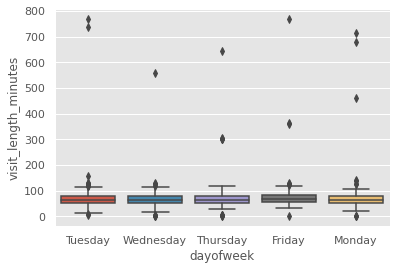

In [ ]:
axdayoftheweek = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_final)

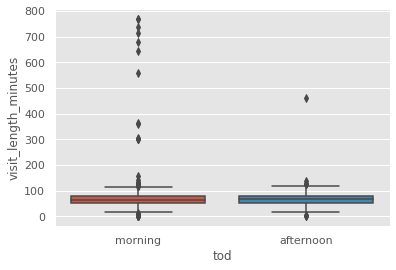

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_final)

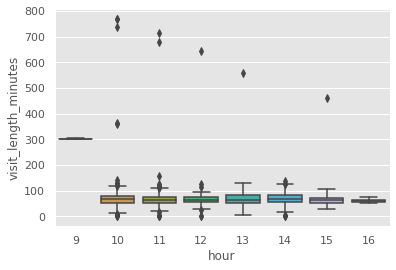

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_final)

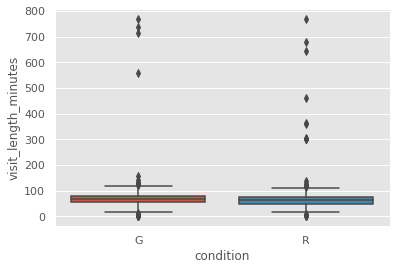

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_final)

## Outlier Removal

There are many odd outliers in this data. This section removes these outliers.

In [ ]:
df_outliers = df_final[(np.abs(stats.zscore(df_final['visit_length_minutes'])) < 3)]
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]
print(df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count())

Patient                 16
newfrom                 16
newto                   16
xlocation_last          16
ylocation_last          16
visit_length            16
start_day               16
end_day                 16
sameday                 16
dayofweek               16
tod                     16
hour                    16
condition               16
visit_length_minutes    16
dtype: int64


## Removal of 0 Minute Journeys

The section below creates a dataframe where journeys that have a journey time of 0 minutes are removed.

In [ ]:
df_nozero = df_outliers.loc[(df_outliers[['visit_length_minutes']] != 0).all(axis=1)]
df_nozero

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
1,G1223,2021-11-30 10:11:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:44:00,30,30,equal,Tuesday,morning,10,G,104.0000
2,G1224,2021-11-30 10:20:00,2021-11-30 11:35:00,5.639,5.397,0 days 01:15:00,30,30,equal,Tuesday,morning,10,G,75.0000
3,G1225,2021-11-30 10:34:00,2021-11-30 11:55:00,5.639,5.397,0 days 01:21:00,30,30,equal,Tuesday,morning,10,G,81.0000
4,G1226,2021-11-30 10:38:00,2021-11-30 11:30:00,3.838,4.525,0 days 00:52:00,30,30,equal,Tuesday,morning,10,G,52.0000
6,G1228,2021-11-30 10:58:00,2021-11-30 12:30:00,5.639,5.397,0 days 01:32:00,30,30,equal,Tuesday,morning,10,G,92.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,R1254,2022-01-27 10:22:00,2022-01-27 10:49:00,3.959,4.489,0 days 00:27:00,27,27,equal,Thursday,morning,10,R,27.0000
1023,R1255,2022-01-27 11:03:00,2022-01-27 11:49:00,6.347,5.889,0 days 00:46:00,27,27,equal,Thursday,morning,11,R,46.0000
1024,R1256,2022-01-27 11:58:00,2022-01-27 12:26:00,3.959,4.489,0 days 00:28:00,27,27,equal,Thursday,morning,11,R,28.0000
1032,R2000,2021-12-20 10:10:00,2021-12-20 11:14:00,7.146,4.605,0 days 01:04:00,20,20,equal,Monday,morning,10,R,64.0000


## Start of Final Analysis

In [ ]:
mean = df_outliers['visit_length_minutes'].mean()
print(mean)
print(df_nozero['visit_length_minutes'].mean())

66.3074656188605
66.37266470009833


## Day of Week Analysis and Plots

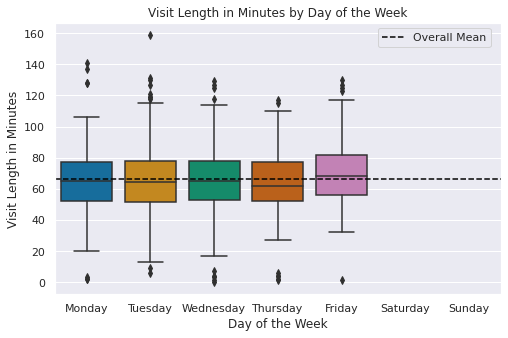

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated.png', bbox_inches='tight')

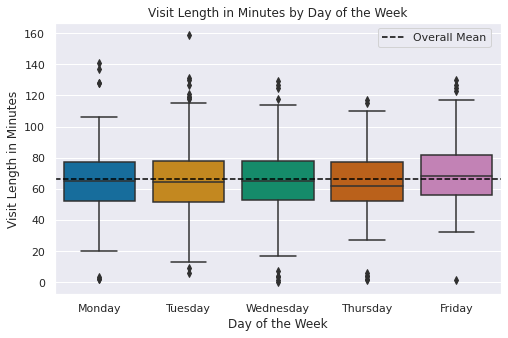

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list_noweekend)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated_noweekend.png', bbox_inches='tight')

## Time of Day Analysis and Plots

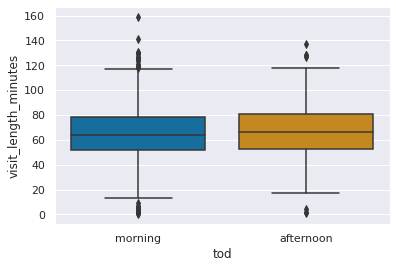

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)

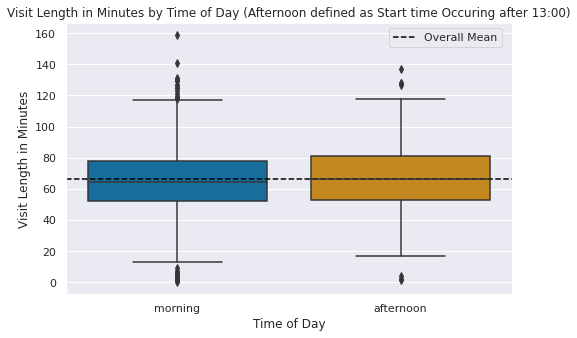

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Time of Day (Afternoon defined as Start time Occuring after 13:00)')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('timeofday_updated.png', bbox_inches='tight')

## Condition Analysis and Plots

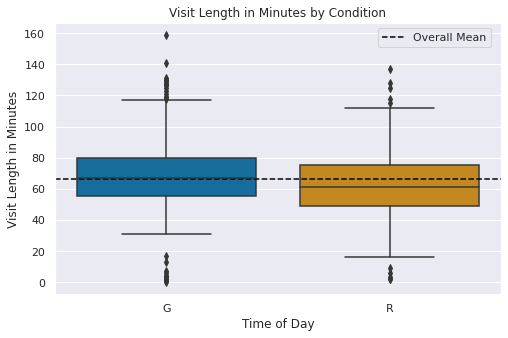

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Condition')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('condition_updated.png', bbox_inches='tight')

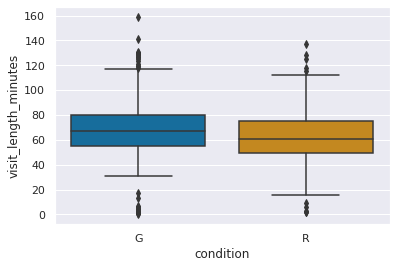

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers)

## Starting Hour Analysis and Plots

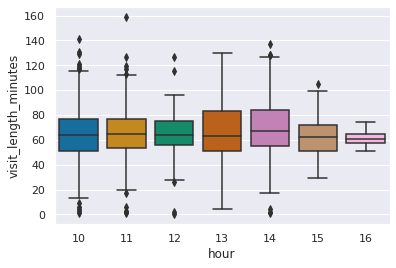

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)

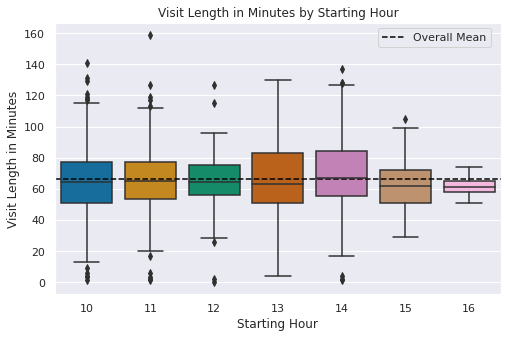

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Starting Hour')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Starting Hour')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('hour_updated.png', bbox_inches='tight')

## Summary Statistics of Each Analysis

The section below gets the summary statistics of each analysis done. These are used in the PowerPoint in the Findings folder in the MS Teams.

In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
df_outliers['visit_length_minutes'].describe()

count                                 1,018.0000
mean                                     66.3075
std                                      21.5020
min                                       0.0000
25%                                      53.0000
50%                                      65.0000
75%                                      78.0000
max                                     159.0000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].describe()

count                                 1,032.0000
mean                                     72.4535
std                                      60.6991
min                                       0.0000
25%                                      53.0000
50%                                      65.0000
75%                                      79.0000
max                                     770.0000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].median()

65.0

In [ ]:
df_outliers['visit_length'].describe()

count                         1018
mean     0 days 01:06:18.447937131
std      0 days 00:21:30.121436640
min                0 days 00:00:00
25%                0 days 00:53:00
50%                0 days 01:05:00
75%                0 days 01:18:00
max                0 days 02:39:00
Name: visit_length, dtype: object

In [ ]:
df_final['visit_length'].describe()

count                         1032
mean     0 days 01:12:27.209302325
std      0 days 01:00:41.945627840
min                0 days 00:00:00
25%                0 days 00:53:00
50%                0 days 01:05:00
75%                0 days 01:19:00
max                0 days 12:50:00
Name: visit_length, dtype: object

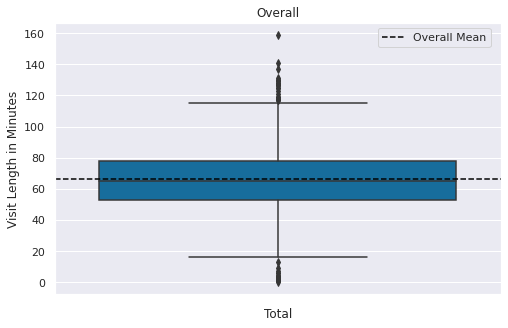

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(y="visit_length_minutes", data=df_outliers)
svm.set_title('Overall')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Total')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('tested.png', bbox_inches='tight')

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
0
Ten
279
Eleven
242
Twelve
74
One
113
Two
209
Three
97
Four
4


In [ ]:
print('Monday Outlier')
mondayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Monday'].count()
print(mondayoutlier)

print('Tuesday Outlier')
tuesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Tuesday'].count()
print(tuesdayoutlier)

print('Wednesday Outlier')
wednesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Wednesday'].count()
print(wednesdayoutlier)

print('Thursday Outlier')
thursdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Thursday'].count()
print(thursdayoutlier)

print('Friday Outlier')
fridayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Friday'].count()
print(fridayoutlier)

print('Saturday Outlier')
saturdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Saturday'].count()
print(saturdayoutlier)

print('Sunday Outlier')
sundayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Sunday'].count()
print(sundayoutlier)

Monday Outlier
129
Tuesday Outlier
243
Wednesday Outlier
241
Thursday Outlier
217
Friday Outlier
188
Saturday Outlier
0
Sunday Outlier
0


In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length_minutes'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
dayoftheweekmean

dayofweek
Monday                                       65.5736
Tuesday                                      66.3416
Wednesday                                    66.1660
Thursday                                     63.5806
Friday                                       70.0957
Saturday                                         NaN
Sunday                                           NaN
Name: visit_length_minutes, dtype: float64

In [ ]:
print('G')
glaucomacount = df_outliers['condition'][df_outliers['condition']=='G'].count()
print(glaucomacount)

print('R')
rcount = df_outliers['condition'][df_outliers['condition']=='R'].count()
print(rcount)

G
646
R
372


In [ ]:
conditionmean = df_outliers.groupby('condition')['visit_length_minutes'].mean(numeric_only=False)
conditionmean

condition
G                                    68.4458
R                                    62.5941
Name: visit_length_minutes, dtype: float64

In [ ]:
print('morning')
morningcount = df_outliers['tod'][df_outliers['tod']=='morning'].count()
print(morningcount)

print('afternoon')
afternooncount = df_outliers['tod'][df_outliers['tod']=='afternoon'].count()
print(afternooncount)

morning
708
afternoon
310


In [ ]:
todmean = df_outliers.groupby('tod')['visit_length_minutes'].mean(numeric_only=False)
todmean

tod
afternoon                                    67.6226
morning                                      65.7316
Name: visit_length_minutes, dtype: float64

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
0
Ten
279
Eleven
242
Twelve
74
One
113
Two
209
Three
97
Four
4


In [ ]:
hourmean = df_outliers.groupby('hour')['visit_length_minutes'].mean(numeric_only=False)
hourmean

hour
10                                    66.0108
11                                    64.9463
12                                    64.5000
13                                    67.5310
14                                    69.7273
15                                    63.3299
16                                    61.7500
Name: visit_length_minutes, dtype: float64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
23,G1245,2021-12-01 10:29:00,2021-12-01 10:33:00,5.788,4.183,0 days 00:04:00,1,1,equal,Wednesday,morning,10,G,4.0000
26,G1248,2021-12-01 11:02:00,2021-12-01 11:03:00,3.409,6.753,0 days 00:01:00,1,1,equal,Wednesday,morning,11,G,1.0000
30,G1252,2021-12-01 12:21:00,2021-12-01 12:21:00,4.875,4.847,0 days 00:00:00,1,1,equal,Wednesday,morning,12,G,0.0000
63,G1285,2021-12-02 14:27:00,2021-12-02 14:31:00,6.347,5.889,0 days 00:04:00,2,2,equal,Thursday,afternoon,14,G,4.0000
244,G1474,2021-12-23 13:23:00,2021-12-23 13:27:00,3.959,4.489,0 days 00:04:00,23,23,equal,Thursday,morning,13,G,4.0000
359,G1591,2022-01-06 14:48:00,2022-01-06 14:49:00,6.347,4.489,0 days 00:01:00,6,6,equal,Thursday,afternoon,14,G,1.0000
386,G1625,2022-01-10 11:30:00,2022-01-10 11:32:00,6.347,4.489,0 days 00:02:00,10,10,equal,Monday,morning,11,G,2.0000
417,G1656,2022-01-12 13:41:00,2022-01-12 13:48:00,4.861,4.945,0 days 00:07:00,12,12,equal,Wednesday,morning,13,G,7.0000
514,G1755,2022-01-20 10:56:00,2022-01-20 11:02:00,2.763,5.582,0 days 00:06:00,20,20,equal,Thursday,morning,10,G,6.0000
555,G1797,2022-01-24 10:39:00,2022-01-24 10:42:00,6.347,4.489,0 days 00:03:00,24,24,equal,Monday,morning,10,G,3.0000


In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count()

Patient                 16
newfrom                 16
newto                   16
xlocation_last          16
ylocation_last          16
visit_length            16
start_day               16
end_day                 16
sameday                 16
dayofweek               16
tod                     16
hour                    16
condition               16
visit_length_minutes    16
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] == 0).all(axis=1)].count()

Patient                 1
newfrom                 1
newto                   1
xlocation_last          1
ylocation_last          1
visit_length            1
start_day               1
end_day                 1
sameday                 1
dayofweek               1
tod                     1
hour                    1
condition               1
visit_length_minutes    1
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length']]).all(axis=1)].count()

Patient                 1017
newfrom                 1017
newto                   1017
xlocation_last          1017
ylocation_last          1017
visit_length            1017
start_day               1017
end_day                 1017
sameday                 1017
dayofweek               1017
tod                     1017
hour                    1017
condition               1017
visit_length_minutes    1017
dtype: int64

In [ ]:
df_outliers.nsmallest(5, 'visit_length')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
30,G1252,2021-12-01 12:21:00,2021-12-01 12:21:00,4.875,4.847,0 days 00:00:00,1,1,equal,Wednesday,morning,12,G,0.0000
26,G1248,2021-12-01 11:02:00,2021-12-01 11:03:00,3.409,6.753,0 days 00:01:00,1,1,equal,Wednesday,morning,11,G,1.0000
359,G1591,2022-01-06 14:48:00,2022-01-06 14:49:00,6.347,4.489,0 days 00:01:00,6,6,equal,Thursday,afternoon,14,G,1.0000
638,G2150,2021-12-17 10:40:00,2021-12-17 10:41:00,6.347,5.889,0 days 00:01:00,17,17,equal,Friday,morning,10,G,1.0000
386,G1625,2022-01-10 11:30:00,2022-01-10 11:32:00,6.347,4.489,0 days 00:02:00,10,10,equal,Monday,morning,11,G,2.0000


In [ ]:
df_outliers.nsmallest(5, 'visit_length_minutes')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
30,G1252,2021-12-01 12:21:00,2021-12-01 12:21:00,4.875,4.847,0 days 00:00:00,1,1,equal,Wednesday,morning,12,G,0.0000
26,G1248,2021-12-01 11:02:00,2021-12-01 11:03:00,3.409,6.753,0 days 00:01:00,1,1,equal,Wednesday,morning,11,G,1.0000
359,G1591,2022-01-06 14:48:00,2022-01-06 14:49:00,6.347,4.489,0 days 00:01:00,6,6,equal,Thursday,afternoon,14,G,1.0000
638,G2150,2021-12-17 10:40:00,2021-12-17 10:41:00,6.347,5.889,0 days 00:01:00,17,17,equal,Friday,morning,10,G,1.0000
386,G1625,2022-01-10 11:30:00,2022-01-10 11:32:00,6.347,4.489,0 days 00:02:00,10,10,equal,Monday,morning,11,G,2.0000


In [ ]:
df_outliers.nlargest(5, 'visit_length_minutes')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
212,G1440,2021-12-21 11:09:00,2021-12-21 13:48:00,3.959,4.489,0 days 02:39:00,21,21,equal,Tuesday,morning,11,G,159.0000
554,G1796,2022-01-24 10:33:00,2022-01-24 12:54:00,6.807,4.123,0 days 02:21:00,24,24,equal,Monday,morning,10,G,141.0000
991,R1220,2022-01-24 14:28:00,2022-01-24 16:45:00,6.347,4.489,0 days 02:17:00,24,24,equal,Monday,afternoon,14,R,137.0000
575,G1817,2022-01-25 10:56:00,2022-01-25 13:07:00,3.959,4.489,0 days 02:11:00,25,25,equal,Tuesday,morning,10,G,131.0000
75,G1297,2021-12-03 13:42:00,2021-12-03 15:52:00,6.347,4.489,0 days 02:10:00,3,3,equal,Friday,morning,13,G,130.0000


In [ ]:
df_outliers.nlargest(5, 'visit_length')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
212,G1440,2021-12-21 11:09:00,2021-12-21 13:48:00,3.959,4.489,0 days 02:39:00,21,21,equal,Tuesday,morning,11,G,159.0000
554,G1796,2022-01-24 10:33:00,2022-01-24 12:54:00,6.807,4.123,0 days 02:21:00,24,24,equal,Monday,morning,10,G,141.0000
991,R1220,2022-01-24 14:28:00,2022-01-24 16:45:00,6.347,4.489,0 days 02:17:00,24,24,equal,Monday,afternoon,14,R,137.0000
575,G1817,2022-01-25 10:56:00,2022-01-25 13:07:00,3.959,4.489,0 days 02:11:00,25,25,equal,Tuesday,morning,10,G,131.0000
75,G1297,2021-12-03 13:42:00,2021-12-03 15:52:00,6.347,4.489,0 days 02:10:00,3,3,equal,Friday,morning,13,G,130.0000


In [ ]:
df_final.nlargest(20, 'visit_length')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G1221,2021-11-30 10:10:00,2021-11-30 23:00:00,5.892,15.039,0 days 12:50:00,30,30,equal,Tuesday,morning,10,G,770.0000
1030,R1305,2022-01-28 10:11:00,2022-01-28 23:00:00,4.671,5.148,0 days 12:49:00,28,28,equal,Friday,morning,10,R,769.0000
5,G1227,2021-11-30 10:44:00,2021-11-30 23:00:00,8.143,15.999,0 days 12:16:00,30,30,equal,Tuesday,morning,10,G,736.0000
647,G4008,2021-12-20 11:05:00,2021-12-20 23:00:00,0.223,9.181,0 days 11:55:00,20,20,equal,Monday,morning,11,G,715.0000
705,R0923,2021-12-06 11:41:00,2021-12-06 23:00:00,7.236,5.009,0 days 11:19:00,6,6,equal,Monday,morning,11,R,679.0000
677,R0895,2021-12-02 12:14:00,2021-12-02 23:00:00,6.897,14.631,0 days 10:46:00,2,2,equal,Thursday,morning,12,R,646.0000
500,G1740,2022-01-19 13:40:00,2022-01-19 23:00:00,9.016,16.929,0 days 09:20:00,19,19,equal,Wednesday,morning,13,G,560.0000
866,R1091,2022-01-10 15:20:00,2022-01-10 23:00:00,7.357,15.212,0 days 07:40:00,10,10,equal,Monday,afternoon,15,R,460.0000
1029,R1304,2022-01-28 10:09:00,2022-01-28 16:12:00,5.225,4.821,0 days 06:03:00,28,28,equal,Friday,morning,10,R,363.0000
1031,R1306,2022-01-28 10:11:00,2022-01-28 16:12:00,6.347,4.489,0 days 06:01:00,28,28,equal,Friday,morning,10,R,361.0000


In [ ]:
df_outliers.nlargest(20, 'visit_length')

,Patient,newfrom,newto,xlocation_last,ylocation_last,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
212,G1440,2021-12-21 11:09:00,2021-12-21 13:48:00,3.959,4.489,0 days 02:39:00,21,21,equal,Tuesday,morning,11,G,159.0000
554,G1796,2022-01-24 10:33:00,2022-01-24 12:54:00,6.807,4.123,0 days 02:21:00,24,24,equal,Monday,morning,10,G,141.0000
991,R1220,2022-01-24 14:28:00,2022-01-24 16:45:00,6.347,4.489,0 days 02:17:00,24,24,equal,Monday,afternoon,14,R,137.0000
575,G1817,2022-01-25 10:56:00,2022-01-25 13:07:00,3.959,4.489,0 days 02:11:00,25,25,equal,Tuesday,morning,10,G,131.0000
75,G1297,2021-12-03 13:42:00,2021-12-03 15:52:00,6.347,4.489,0 days 02:10:00,3,3,equal,Friday,morning,13,G,130.0000
144,G1371,2021-12-07 13:43:00,2021-12-07 15:53:00,6.347,4.489,0 days 02:10:00,7,7,equal,Tuesday,morning,13,G,130.0000
155,G1382,2021-12-08 10:40:00,2021-12-08 12:49:00,6.753,4.927,0 days 02:09:00,8,8,equal,Wednesday,morning,10,G,129.0000
569,G1811,2022-01-24 14:47:00,2022-01-24 16:55:00,6.347,4.489,0 days 02:08:00,24,24,equal,Monday,afternoon,14,G,128.0000
939,R1166,2022-01-17 14:40:00,2022-01-17 16:48:00,6.347,4.489,0 days 02:08:00,17,17,equal,Monday,afternoon,14,R,128.0000
276,G1508,2021-12-31 11:12:00,2021-12-31 13:19:00,3.959,4.489,0 days 02:07:00,31,31,equal,Friday,morning,11,G,127.0000


## CSV Creation

This creates a CSV of the patient journies which can be used for subsequent analysis (e.g. cluster analysis).

In [ ]:
phase2df = df_outliers[['Patient', 'newfrom', 'newto', 'visit_length', 'dayofweek', 'tod', 'hour', 'condition', 'visit_length_minutes']].copy()
phase2df.to_csv('phase2df.csv', index=False)